In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Colab Notebooks/car_price_prediction
df=pd.read_csv(r"train.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab Notebooks/car_price_prediction


In [ ]:
df.drop([12900],axis=0,inplace=True)
def removeoutlier(column,numericalcoumn):
  # typpe=list(df[column].value_counts().index)
  typpe=['LPG', 'CNG', 'Plug-in Hybrid']
  print(typpe)
  for i in typpe:
    percentile25 = df[df[column]==i][numericalcoumn].quantile(0.25)
    print(percentile25)
    percentile75 = df[df[column]==i][numericalcoumn].quantile(0.75)
    print(percentile75)
    iqr = percentile75 - percentile25
    print(iqr)
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    print("Upper limit",upper_limit)
    print("Lower limit",lower_limit)
    cat=list(df[(df[column] == i) & (df[numericalcoumn] < lower_limit) | (df[numericalcoumn] > upper_limit)].index)
    print("cattt=",cat)
    print(len(cat))
    df.drop(cat,axis=0,inplace=True)
    print(100*"=")

removeoutlier("Fuel type","Price")

['LPG', 'CNG', 'Plug-in Hybrid']
9408.0
15681.0
6273.0
Upper limit 25090.5
Lower limit -1.5
cattt= [5, 9, 14, 17, 36, 41, 47, 50, 54, 56, 66, 67, 70, 72, 73, 75, 86, 90, 94, 95, 104, 111, 112, 118, 127, 137, 152, 157, 159, 160, 168, 172, 173, 176, 184, 189, 198, 201, 203, 210, 211, 213, 224, 225, 226, 229, 232, 246, 249, 251, 256, 261, 262, 263, 270, 271, 274, 278, 283, 287, 289, 293, 297, 299, 305, 307, 308, 313, 314, 316, 326, 327, 334, 339, 342, 344, 347, 370, 376, 384, 398, 415, 420, 424, 435, 437, 440, 445, 450, 451, 453, 455, 463, 474, 478, 483, 484, 485, 506, 529, 535, 546, 560, 561, 573, 575, 579, 580, 581, 591, 594, 604, 608, 618, 621, 623, 630, 632, 633, 642, 647, 650, 667, 668, 671, 675, 687, 689, 699, 701, 708, 711, 716, 722, 723, 724, 732, 736, 737, 739, 740, 747, 749, 781, 783, 792, 794, 796, 803, 807, 808, 814, 822, 823, 825, 829, 832, 839, 842, 843, 849, 855, 857, 862, 873, 874, 875, 883, 885, 889, 902, 906, 907, 910, 925, 927, 928, 929, 933, 939, 947, 951, 959, 961, 96

In [ ]:
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12038 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                12038 non-null  int64  
 1   Price             12038 non-null  int64  
 2   Levy              12038 non-null  object 
 3   Manufacturer      12038 non-null  object 
 4   Model             12038 non-null  object 
 5   Prod. year        12038 non-null  int64  
 6   Category          12038 non-null  object 
 7   Leather interior  12038 non-null  object 
 8   Fuel type         12038 non-null  object 
 9   Engine volume     12038 non-null  object 
 10  Mileage           12038 non-null  object 
 11  Cylinders         12038 non-null  float64
 12  Gear box type     12038 non-null  object 
 13  Drive wheels      12038 non-null  object 
 14  Doors             12038 non-null  object 
 15  Wheel             12038 non-null  object 
 16  Color             12038 non-null  object

In [ ]:
df.isnull().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

In [ ]:
df["Levy"].value_counts()
df["Levy"].replace("-",0,inplace=True)

In [ ]:
df["Levy"]=df["Levy"].astype("int")

In [ ]:
def cat(df):
  for i in df.select_dtypes(["object"]).columns:
    print(i.upper())
    print("="*100)
    print(df[i].value_counts())
    print("=+"*100)

In [ ]:
cat(df)

MANUFACTURER
TOYOTA           2388
HYUNDAI          1726
MERCEDES-BENZ    1350
FORD              752
HONDA             745
CHEVROLET         701
LEXUS             622
BMW               602
NISSAN            528
VOLKSWAGEN        416
OPEL              393
KIA               257
SUBARU            225
MITSUBISHI        218
AUDI              183
MAZDA             152
DAEWOO             91
DODGE              82
SUZUKI             68
FIAT               63
SSANGYONG          57
JEEP               55
VAZ                47
RENAULT            30
CHRYSLER           22
JAGUAR             21
MINI               21
PORSCHE            17
SKODA              15
VOLVO              15
PEUGEOT            14
GMC                14
ACURA              14
DAIHATSU           13
INFINITI           13
UAZ                12
LAND ROVER         11
BUICK              11
GAZ                11
CADILLAC            9
LINCOLN             9
CITROEN             7
SCION               5
ISUZU               4
MOSKVICH           

In [ ]:
df["Mileage"]=df["Mileage"].apply(lambda x: x.split(" ")[0]).astype("int64")
df["Mileage"]

0        186005
1        192000
2        200000
3        168966
4         91901
          ...  
19231    107800
19232    300000
19233    161600
19235     51258
19236    186923
Name: Mileage, Length: 12038, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12038 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                12038 non-null  int64  
 1   Price             12038 non-null  int64  
 2   Levy              12038 non-null  int64  
 3   Manufacturer      12038 non-null  object 
 4   Model             12038 non-null  object 
 5   Prod. year        12038 non-null  int64  
 6   Category          12038 non-null  object 
 7   Leather interior  12038 non-null  object 
 8   Fuel type         12038 non-null  object 
 9   Engine volume     12038 non-null  object 
 10  Mileage           12038 non-null  int64  
 11  Cylinders         12038 non-null  float64
 12  Gear box type     12038 non-null  object 
 13  Drive wheels      12038 non-null  object 
 14  Doors             12038 non-null  object 
 15  Wheel             12038 non-null  object 
 16  Color             12038 non-null  object

<Axes: xlabel='Price', ylabel='Fuel type'>

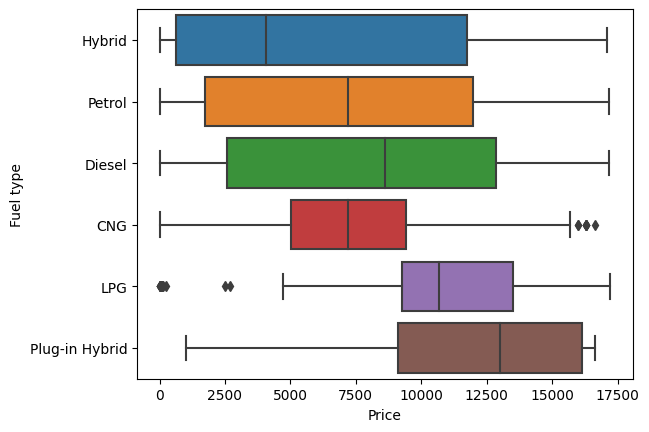

In [ ]:
sns.boxplot(data=df,x="Price",y="Fuel type")

<Axes: xlabel='Price', ylabel='Fuel type'>

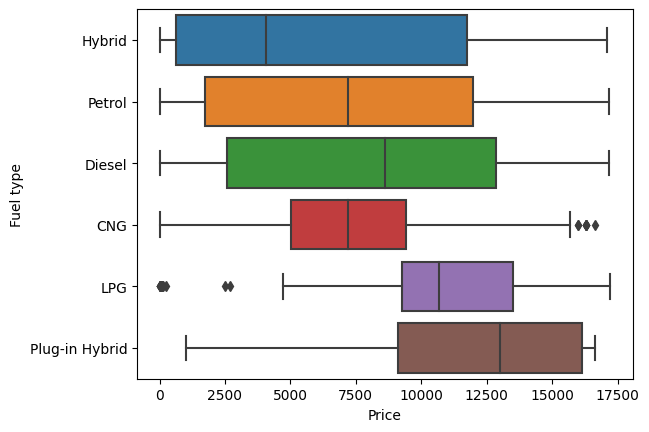

In [ ]:
sns.boxplot(data=df,x="Price",y="Fuel type")

In [ ]:
df["Price"].mean()

7412.730603090215

In [ ]:
df

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,04-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19231,45772306,5802,1055,MERCEDES-BENZ,E 350,2013,Sedan,Yes,Diesel,3.5,107800,6.0,Automatic,Rear,04-May,Left wheel,Grey,12
19232,45798355,8467,0,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258,4.0,Automatic,Front,04-May,Left wheel,Black,4


In [ ]:
df["Engine volume"]=df["Engine volume"].apply(lambda x: x.split(" ")[0])
df["Engine volume"].astype("float")

from sklearn.model_selection import train_test_split
x=df.drop(["Price","ID","Leather interior","Cylinders","Levy"],axis=1)
y=df["Price"]


In [ ]:
from sklearn.preprocessing import OrdinalEncoder,StandardScaler

ord=OrdinalEncoder()
cat=x.select_dtypes("object").columns
x[cat]=ord.fit_transform(x[cat])
# xtest[cat]=ord.fit_transform(xtest[cat])
x

,Manufacturer,Model,Prod. year,Category,Fuel type,Engine volume,Mileage,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,28.0,837.0,2010,4.0,2.0,39.0,186005,0.0,0.0,1.0,0.0,12.0,12
1,6.0,467.0,2011,4.0,4.0,33.0,192000,2.0,0.0,1.0,0.0,1.0,8
2,18.0,483.0,2006,3.0,4.0,14.0,200000,3.0,1.0,1.0,1.0,1.0,2
3,13.0,468.0,2011,4.0,2.0,27.0,168966,0.0,0.0,1.0,0.0,14.0,0
4,18.0,483.0,2014,3.0,4.0,14.0,91901,0.0,1.0,1.0,0.0,12.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19231,32.0,432.0,2013,9.0,1.0,39.0,107800,0.0,2.0,1.0,0.0,7.0,12
19232,32.0,283.0,1999,1.0,0.0,22.0,300000,1.0,2.0,0.0,0.0,12.0,5
19233,20.0,903.0,2011,9.0,4.0,26.0,161600,2.0,1.0,1.0,0.0,11.0,8
19235,6.0,325.0,2007,4.0,1.0,21.0,51258,0.0,1.0,1.0,0.0,1.0,4


<Axes: >

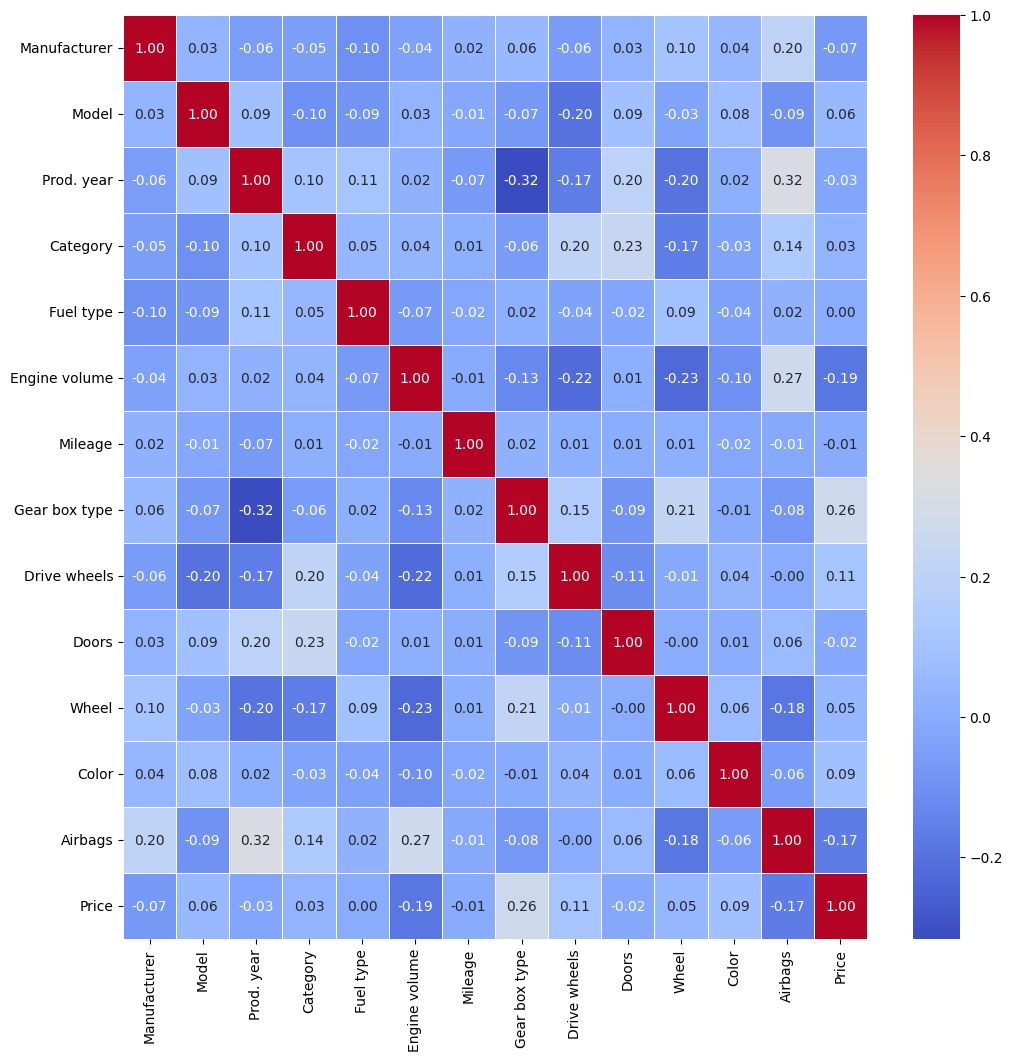

In [ ]:
x["Price"]=y
plt.figure(figsize=(12,12))
sns.heatmap(x.corr(),annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=45)


In [ ]:
# from sklearn.feature_selection import VarianceThreshold
# variance=VarianceThreshold(threshold=0.2)
# variance.fit(xtrain)
# variance.get_support()
# print(len(variance.get_support()))

# print(len(xtrain.columns[variance.get_support()]))
# print(xtrain.columns[variance.get_support()])
# print(xtrain.columns)
# xtrain=xtrain[xtrain.columns[variance.get_support()]]
# xtrain
# xtest=variance.transform(xtest)
# xtest.shape

In [ ]:
st=StandardScaler()
xtrain=st.fit_transform(xtrain)
xtest=st.fit_transform(xtest)
xtrain.shape

(9630, 14)

In [ ]:
import tensorflow as tf
from tensorflow.keras import regularizers

In [ ]:
model=tf.keras.Sequential([
  tf.keras.layers.Dense(128, input_dim=14, activation='relu',kernel_regularizer=regularizers.l1(0.1)),
  tf.keras.layers.Dense(128,activation="relu"),
  tf.keras.layers.Dense(64,activation="relu"),
  tf.keras.layers.Dense(1,activation="linear")
]
)

In [ ]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense
# from tensorflow.keras import regularizers

# # Build the model with L2 regularization on the first dense layer
# model = Sequential()
# model.add(Dense(128, input_dim=12, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
# model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
# model.add(Dense(64, activation='relu'))
# model.add(Dense(1, activation='linear'))

In [ ]:
model.compile(
    optimizer="adam",
    loss=tf.keras.losses.huber,
    metrics=["mae"]
)

In [ ]:
model.fit(xtrain,ytrain, epochs=15 ,batch_size=1,verbose=1)

Epoch 1/15
9630/9630 [==============================] - 25s 2ms/step - loss: 473.1190 - mae: 458.7363
Epoch 2/15
9630/9630 [==============================] - 24s 2ms/step - loss: 140.4958 - mae: 129.6455
Epoch 3/15
9630/9630 [==============================] - 25s 3ms/step - loss: 128.8445 - mae: 119.9997
Epoch 4/15
9630/9630 [==============================] - 24s 2ms/step - loss: 116.2031 - mae: 108.8814
Epoch 5/15
9630/9630 [==============================] - 24s 2ms/step - loss: 109.4778 - mae: 103.0476
Epoch 6/15
9630/9630 [==============================] - 22s 2ms/step - loss: 102.8104 - mae: 96.9005
Epoch 7/15
9630/9630 [==============================] - 22s 2ms/step - loss: 97.4683 - mae: 91.8620
Epoch 8/15
9630/9630 [==============================] - 27s 3ms/step - loss: 92.5687 - mae: 87.2204
Epoch 9/15
9630/9630 [==============================] - 24s 2ms/step - loss: 90.2843 - mae: 85.1127
Epoch 10/15
9630/9630 [==============================] - 26s 3ms/step - loss: 87.9699 - m

In [ ]:
ypred=model.predict(xtest)

76/76 [==============================] - 0s 1ms/step


In [ ]:
from sklearn.metrics import r2_score
r2_score(ypred,ytest)

0.9995882445512522

In [ ]:
train_loss = model.evaluate(xtrain, ytrain)
print(f"Training Loss: {train_loss}")
test_loss = model.evaluate(xtest, ytest)
print(f"Testing Loss: {test_loss}")


301/301 [==============================] - 1s 2ms/step - loss: 86.5336 - mae: 81.8975
Training Loss: [86.5335693359375, 81.89750671386719]
76/76 [==============================] - 0s 2ms/step - loss: 77.6536 - mae: 73.0164
Testing Loss: [77.65357208251953, 73.01642608642578]


In [ ]:
#df.drop(list(df[df["Fuel type"]=="Petrol"].index),axis=0)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,04-May,Left wheel,White,0
6,45656768,1803,761,TOYOTA,Prius,2010,Hatchback,Yes,Hybrid,1.8,258909,4.0,Automatic,Front,04-May,Left wheel,White,12
8,45641395,1098,394,TOYOTA,Camry,2014,Sedan,Yes,Hybrid,2.5,398069,4.0,Automatic,Front,04-May,Left wheel,Black,12
10,45621750,941,1053,MERCEDES-BENZ,E 350,2014,Sedan,Yes,Diesel,3.5,184467,6.0,Automatic,Rear,04-May,Left wheel,White,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19230,45760891,470,645,TOYOTA,Prius,2011,Hatchback,Yes,Hybrid,1.8,307325,4.0,Automatic,Front,04-May,Left wheel,Silver,12
19231,45772306,5802,1055,MERCEDES-BENZ,E 350,2013,Sedan,Yes,Diesel,3.5,107800,6.0,Automatic,Rear,04-May,Left wheel,Grey,12
19232,45798355,8467,0,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0,300000,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258,4.0,Automatic,Front,04-May,Left wheel,Black,4


In [ ]:
#2df[(df["Fuel type"] == "Petrol") & (df["Price"] > lower_limit) & (df["Price"] < upper_limit)]


SyntaxError: invalid decimal literal (<ipython-input-32-3d5cd8b9a588>, line 1)

In [ ]:
#df["Fuel type"].value_counts()

In [ ]:
 percentile25 = df[df["Fuel type"]=="Petrol"]["Price"].quantile(0.25)

In [ ]:
# df["Price"].quantile(0.25)

In [ ]:
# list(df[df["Fuel type"]=="Hydrogen"].index)

In [ ]:
# cat=list(df[(df["Fuel type"] == "Petrol") & (df["Price"] > -19913.5) & (df["Price"] < 46570.5)].index)
# print("cattt=",cat)
# print(len(cat))
# df.drop(cat,axis=0)

In [ ]:
# df[(df["Fuel type"] == "Petrol")& (df["Price"] > 46570.5) &(df["Price"]<-19913.5)]